# Classifying Patient Mortality from Breast Cancer Data

<center><img src="https://img.freepik.com/free-photo/world-cancer-day-breast-cancer-awareness-ribbon-white-backg_1232-3604.jpg?w=2000" width="400"></center>

Breast cancer is the most common malignancy among Canadian women (excluding non-melanoma skin cancers). It is the second most typical cancer-related cause of mortality among Canadian women. 

Projections show that in 2022:

* 28,600 Canadian women will be diagnosed with breast cancer. This will represent 25% of all new cases of cancer in women in 2022.

* 5,500 Canadian women will die from breast cancer. This will be the cause of 14% of all female cancer deaths in 2022.

* In Canada, 1 in 8 women will eventually get breast cancer, and 1 in 34 will pass away from it. 

The clinical stage to which the cancer has progressed when diagnosed is one of the most important factors in determining the prognosis and ultimate survival of patients.  In many cases, patients were unaware that they possessed any cancer risks, delaying the diagnosis. It can be beneficial to develop a medium through which individuals could be screened for breast cancer risks before they even occur. Individuals with higher threat can be identified, notified, and given appropriate medical attention to avoid delayed diagnosis.

## Project Goal

**This project aims to formulate multiple classification prediction mechanisms, and compare and employ the best model to assess the risk of possessing breast cancer. The response variable will be the "Status" of patients.**

Classification models developed will be trained through breast cancer dataset (found off kaggle and hosted on github [here](https://raw.githubusercontent.com/achinth-b/stat-301-project/main/Breast_Cancer.csv)). 



## Description of Variables


* **Age**: Age of breast cancer patient in years. 

* **Race**: One of White, Black or Other (American Indian/AK Native, Asian/Pacific Islander).

* **Marital Status**: One of Married, Divorced, Single, Widowed or Separated

* **T Stage**: One of T1, T2, T3 or T4. The T stage describes the size and scope of the primary tumour, in increasing order.

* **N Stage**: One of N1, N2 or N3. These terms describe the quantity and location of lymph nodes that are cancerous, in increasing order. 

* **6th Stage**: One of IIA, IIIA, IIIC, IIB or IIIB. Combining the T, N, and M categories, the tumour grade, and the outcomes of ER/PR and HER2 tests, doctors determine the cancer stage.

* **Diffrentiate**: One of Well Diffrentiated, Moderately Diffrentiated, Poorly Diffrentiated, or Undiffrentiated. 

* **Grade**: One of 1, 2, 3, or anaplastic; Grade IV. 

* **A Stage**: One of Regional or Distant.  Regional — A neoplasm that has extended, Distant — A neoplasm that has spread to parts of the body. 

* **Tumor Size**: Relative size of Tumor cells.

* **Estrogen Status**: One of Positive or Negative. Estrogen positives describe cancer cells that need estrogen to grow. Estrogen negative are a group of tumors with poor prognosis and fewer cancer prevention and treatment strategies.

* **Progesterone Status**: One of Positive or Negative. Progesterone positive is a type of breast cancer sensitive to progesterone. Progesterone negative breast cancers have no estrogen or progesterone receptors.

* **Regional Node Examined**: Number of regional nodes examined. Regional nodes are axillary lymph nodes that receive the majority of the lymphatic drainage from quadrants of the breast. 

* **Regional Node Positive**: Number of regional nodes counted as positive (metastases greater than 0.2mm).

* **Survival Months**: Months Survived with condition.

* **Status**: One of Alive or Dead.

## Exploratory Data Analysis

### Loading Necessary Libraries

In [1]:
library(tidyverse)
library(GGally)
library(corrplot)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded



### Load data 

In [2]:
cancer_dataset = read.csv('https://raw.githubusercontent.com/achinth-b/stat-301-project/main/Breast_Cancer.csv')
colnames(cancer_dataset)[14] = "Regional.Node.Positive"
colnames(cancer_dataset)[6] = "6th.Stage"
head(cancer_dataset, n = 5)

,Age,Race,Marital.Status,T.Stage,N.Stage,6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Regional.Node.Positive,Survival.Months,Status
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### Data Preprocessing

In [34]:
#Changing categorical variables into factors
col_names <- c(2:9,11:12)
cancer_dataset[,col_names]<-lapply(cancer_dataset[,col_names], factor)
head(cancer_dataset)

,Age,Race,Marital.Status,T.Stage,N.Stage,6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Regional.Node.Positive,Survival.Months,Status
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<chr>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
6,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


## Preliminary Observations of data

In [4]:
column_names = colnames(cancer_dataset)
features = column_names[-length(column_names)]
features
cat("The dimensions of our dataset are: ", dim(cancer_dataset))

[1] "Age"                    "Race"                   "Marital.Status"        
 [4] "T.Stage"                "N.Stage"                "6th.Stage"             
 [7] "differentiate"          "Grade"                  "A.Stage"               
[10] "Tumor.Size"             "Estrogen.Status"        "Progesterone.Status"   
[13] "Regional.Node.Examined" "Regional.Node.Positive" "Survival.Months"

The dimensions of our dataset are:  4024 16

We have fifteen possible features, listed above that can help us gauge the status of a patient given these features of their cancer condition. 

In [5]:
glimpse(cancer_dataset)

Rows: 4,024
Columns: 16
$ Age                    <int> 68, 50, 58, 58, 47, 51, 51, 40, 40, 69, 68, 46,…
$ Race                   <fct> White, White, White, White, White, White, White…
$ Marital.Status         <fct> Married, Married, Divorced, Married, Married, S…
$ T.Stage                <fct> T1, T2, T3, T1, T2, T1, T1, T2, T4, T4, T1, T3,…
$ N.Stage                <fct> N1, N2, N3, N1, N1, N1, N1, N1, N3, N3, N1, N1,…
$ `6th.Stage`            <fct> IIA, IIIA, IIIC, IIA, IIB, IIA, IIA, IIB, IIIC,…
$ differentiate          <fct> Poorly differentiated, Moderately differentiate…
$ Grade                  <fct> 3, 2, 2, 3, 3, 2, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2,…
$ A.Stage                <fct> Regional, Regional, Regional, Regional, Regiona…
$ Tumor.Size             <int> 4, 35, 63, 18, 41, 20, 8, 30, 103, 32, 13, 59, …
$ Estrogen.Status        <fct> Positive, Positive, Positive, Positive, Positiv…
$ Progesterone.Status    <fct> Positive, Positive, Positive, Positive, Positiv…
$ Regional.Node.

This information allows us to ensure that our datatypes for our categorical variables are all of the correct type `factor` and `int` or `double` for our continuous variables. 

In [6]:
is.null(cancer_dataset)

[1] FALSE

Our dataset also has 0 null valued points, which makes it easier for us as we do not need to get rid of any of our training examples. 

In [7]:
summary(cancer_dataset)

      Age           Race        Marital.Status T.Stage   N.Stage   6th.Stage  
 Min.   :30.00   Black: 291   Divorced : 486   T1:1603   N1:2732   IIA :1305  
 1st Qu.:47.00   Other: 320   Married  :2643   T2:1786   N2: 820   IIB :1130  
 Median :54.00   White:3413   Separated:  45   T3: 533   N3: 472   IIIA:1050  
 Mean   :53.97                Single   : 615   T4: 102             IIIB:  67  
 3rd Qu.:61.00                Widowed  : 235                       IIIC: 472  
 Max.   :69.00                                                                
                   differentiate                    Grade          A.Stage    
 Moderately differentiated:2351    anaplastic; Grade IV:  19   Distant :  92  
 Poorly differentiated    :1111   1                    : 543   Regional:3932  
 Undifferentiated         :  19   2                    :2351                  
 Well differentiated      : 543   3                    :1111                  
                                                    

## Class Imbalance of Response Variable

As we are trying to investigate a classification problem, we want to see if there is any heavy class imbalance in our data. We visualize the class distribution with a bar chart below:

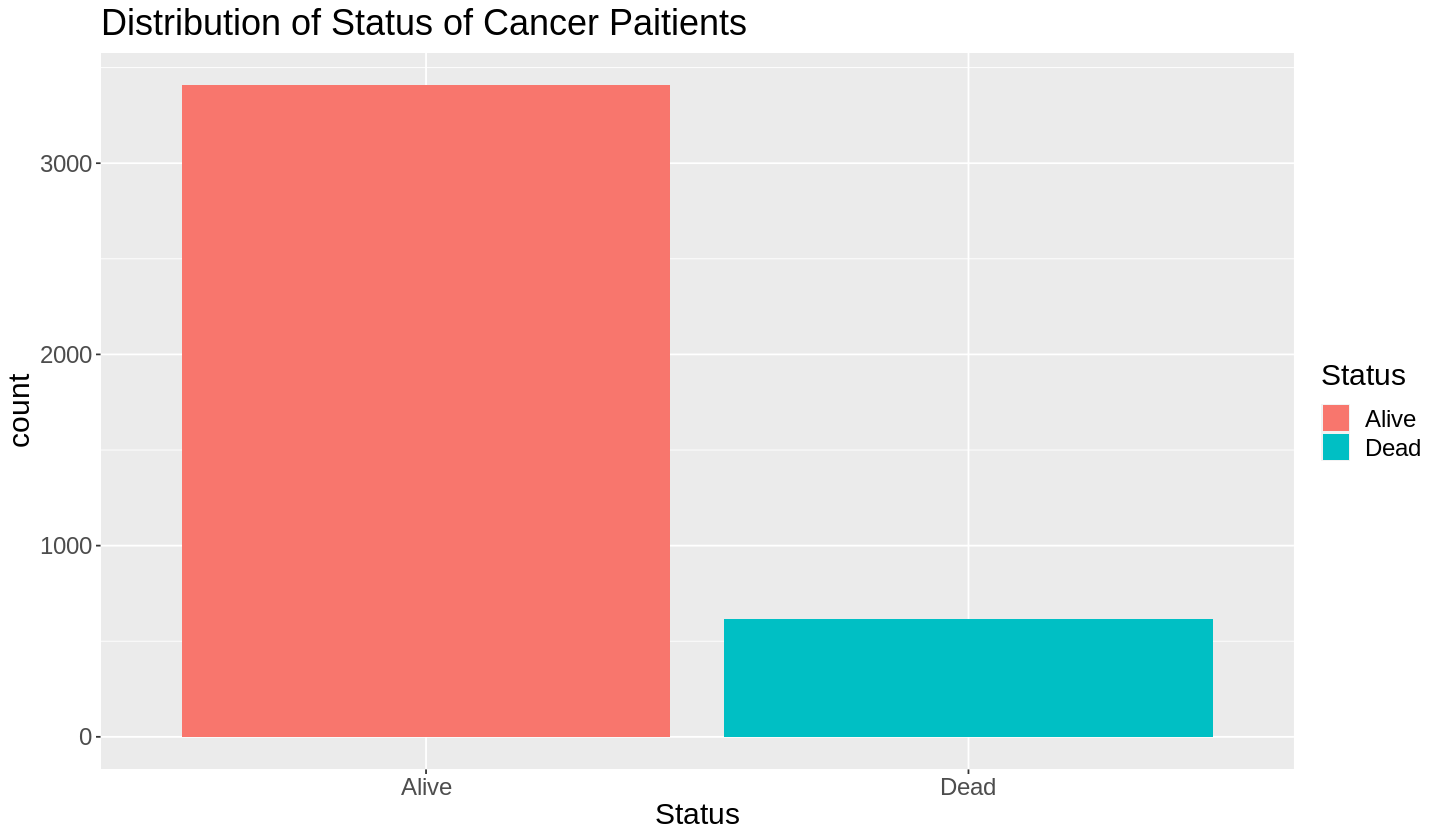

In [8]:
# visualizing the distribution of classes 
options(repr.plot.width = 12, repr.plot.height = 7)

cancer_dataset %>%
    ggplot(aes(x=Status)) +
    geom_bar(aes(fill=Status)) +
    labs(title="Distribution of Status of Cancer Paitients") +
    theme(text = element_text(size=18))

We see that there are a lot more patients alive than dead in our dataset. This indicates class imbalance. If not accounted for, a classifier which always predicted patients to be alive would have a deflated classification error rate. Further investigation is needed to tackle this issue.

## Checking For Multicollinearity

### Scatterplot

We check for multicollinearity between quantitative variables through scatterplots: 

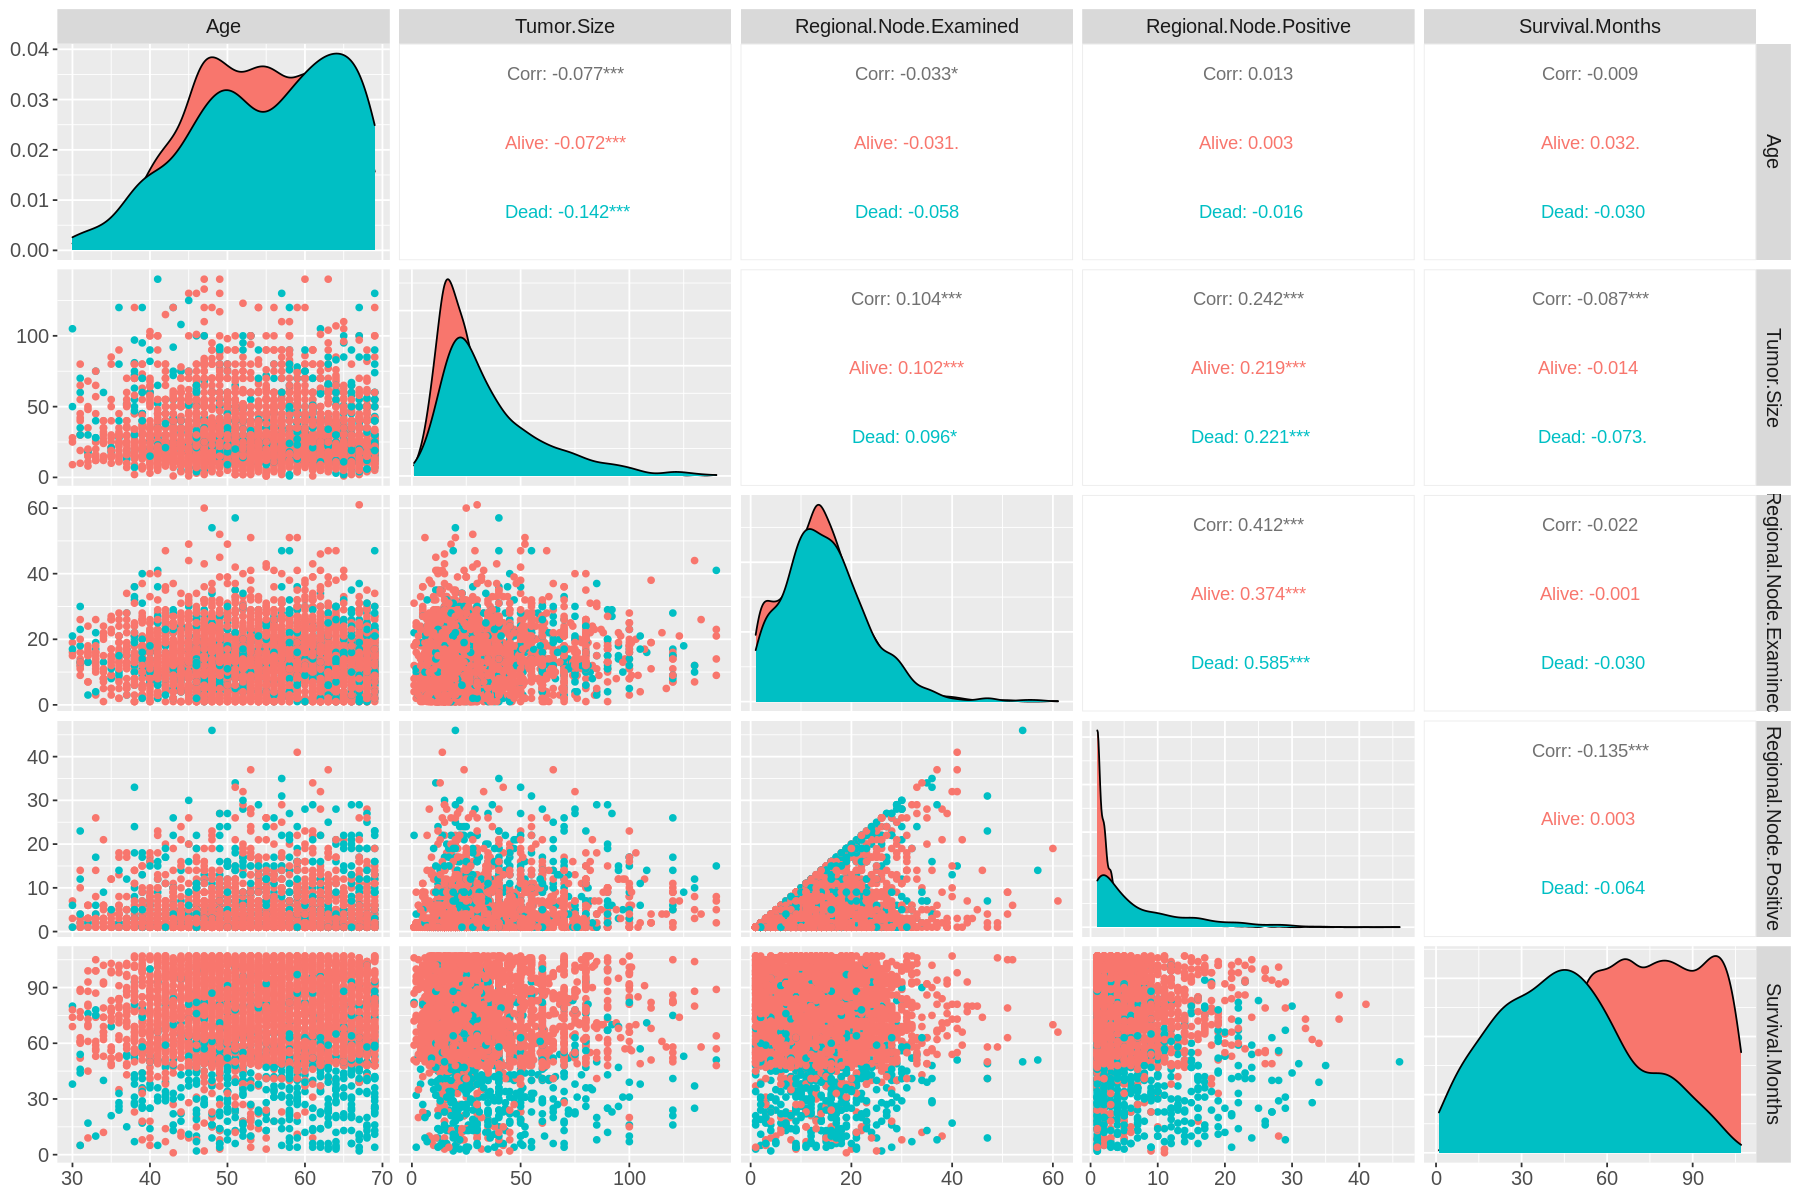

In [9]:
options(repr.plot.width = 15, repr.plot.height = 10)

cancer_dataset_quan <- cancer_dataset %>% 
    select(Age, Tumor.Size, Regional.Node.Examined, Regional.Node.Positive, Survival.Months, Status)

ggpairs(cancer_dataset_quan,
    mapping = ggplot2::aes(color = Status),
    columns = 1:5) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

From examining the plots above, many of the plots seem to have points randomly scattered with no obvious pattern, suggesting that a majority of the predictors do not have much correlation with each other. However, from examining the scatterplot between `Regional.Node.Examined` and `Regional.Node.Positive`, we observe that the points form a funnel shape with the x-axis. From this, we suspect that these predictors would have higher correlation than other pairs of predictors. Checking with the upper triangular portion of the graphic, we see that most correlation values are low, with exception of the pairs (`Regional.Node.Poistive`, `Tumor.Size`) and (`Regional.Node.Poistive`, `Regional.Node.Examined`). These pairs have correlation values of $0.242$ and $0.412$ respectively. 

Overall, predictors are not very correlated with one another, as the magnitude of correlation values are not larger than $0.5$. 

### Heatmap

Because of the nature of the dataset and how its data was collected, there is a high chance of collinearity between categorical variables as well as quantitative variables. 

We creat a heatmap to capture any of these possibilities.

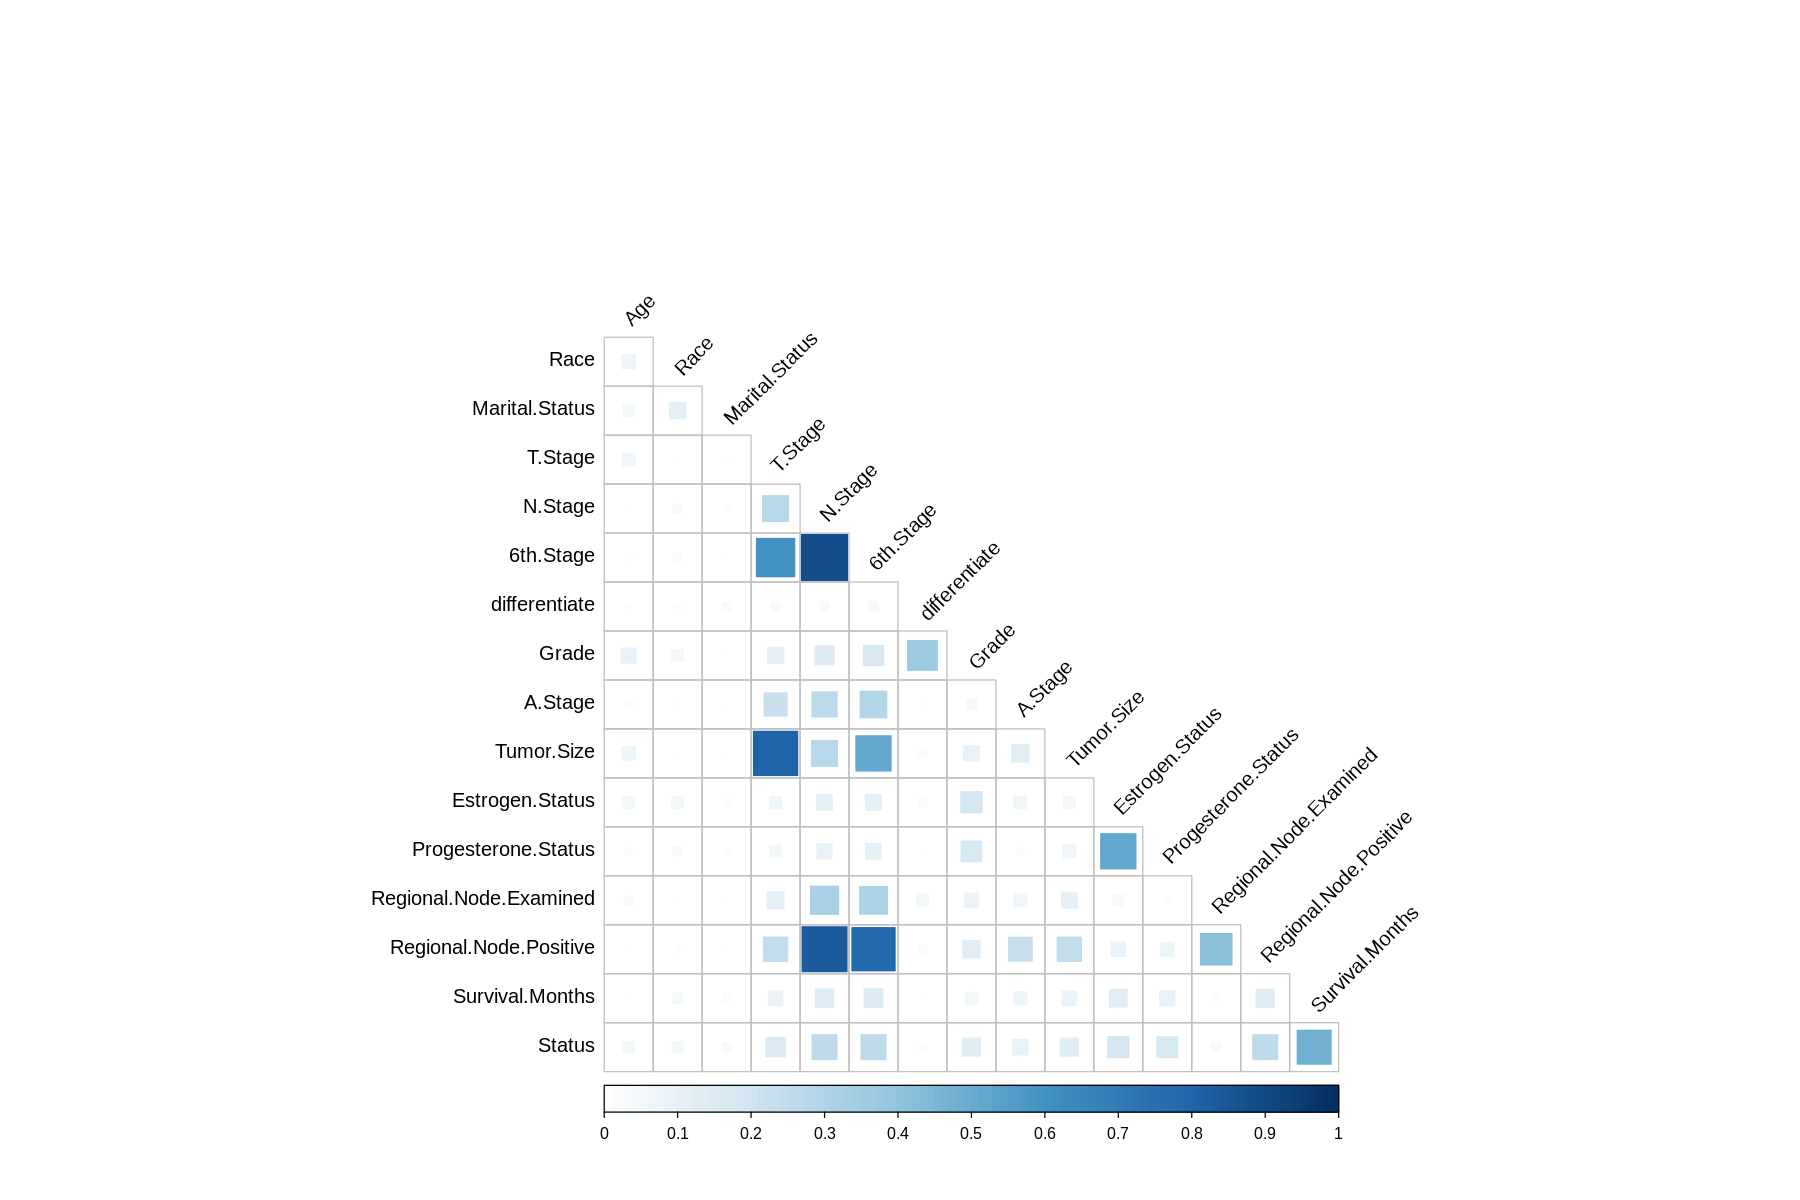

In [36]:
cancer_matrix <- data.matrix(cancer_dataset)
corrplot(abs(cor(cancer_matrix)),
         method = "square", type = "lower", diag = FALSE, tl.col = "black", tl.srt = 45, col.lim = c(0,1)) 

From this visualization we discover additional high correlations, particularly between:

- 6th.Stage and N.Stage 
- Tumor.Size and T.Stage 
- Regoinal.Node.Positive and N.Stage 
- Regoinal.Node.Positive and 6th.Stage 

Given the nature of how the breast cancer variables are collected, we must carefully understand how each variable is collected. As we conduct build our model, we will consider how correlation between categorical variables may affect our data and how to best counter these problems. 

## Methods

The majority of the existing reports on using machine learning to predict the 5-year survival rate of breast cancer have varying results, much of which can be attributed to having taken insufficient data preprocessing steps (Li et al., 2021). With this in mind, we took caution to be thorough in conducting our EDA through taking extra steps to clean our data, check for nulls, and clearly understanding the variables we are working with. Using various visualizations, we are able to gauge the severity of the class imbalance and multicollinearity present in the dataset. Finally, since our dataset is large (n > 4000), we can assume that the CLT takes effect regardless of the distribution of our data. 

We plan on taking the following steps to complete our final report. 

1. Considering the size of our data set, we plan to set aside 20% of our data to use as a test set. With the remaining 80%, we will form training and validation sets. 

2. To solve the class imbalance issue, we can consider the simplistic approaches of either under-sampling of the over-represented class or random over-sampling of the under-represented class. 

3. Then, we will train logistic classification models on our balanced data, employing k-folds cross validation and variable selection techniques to pick appropriate predictors and identify the subset of models which best fits our data.

4. Using evaluation metrics of Mallow's Cp, AIC, and BIC on each of those models, we will estimate the testing errors and select the model that produces the smallest prediction risk.

5. Finally, we will evaluate the performance of the best model using appropriate measures for the test set MSE and interpret the results for discussion. 

With respect to the work that has already been done on breast cancer datasets, as well as the complexity of the interactions between variables, we do not expect very high accuracy in our model. Instead, we aim to build the most robust predictive screening model we can through employing concepts explored in class.

Data on breast cancer, especially in developing countries, is scarce (Unger-Saldana, 2014). Regardless of the accuracy of our model and our overall results, this report should be able to aid in contributing valuable information to the scope of machine learning for breast cancer. Since there is so little existing cases to draw from, our results could provide a point of reference for how significant of an effect imbalanced classes may have and whether simplistic methods like repeated sampling are sufficient to solve them, as well as what kind of factors may be more useful. 

## References

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0250370

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4127616/

https://cancer.ca/en/cancer-information/cancer-types/breast/prognosis-and-survival/survival-statistics